<a href="https://colab.research.google.com/github/ArghavanHabibiBibalani/AI_Class_HomeWorks/blob/main/Optimizing_the_Selection_of_Representative_Samples_in_Forest_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

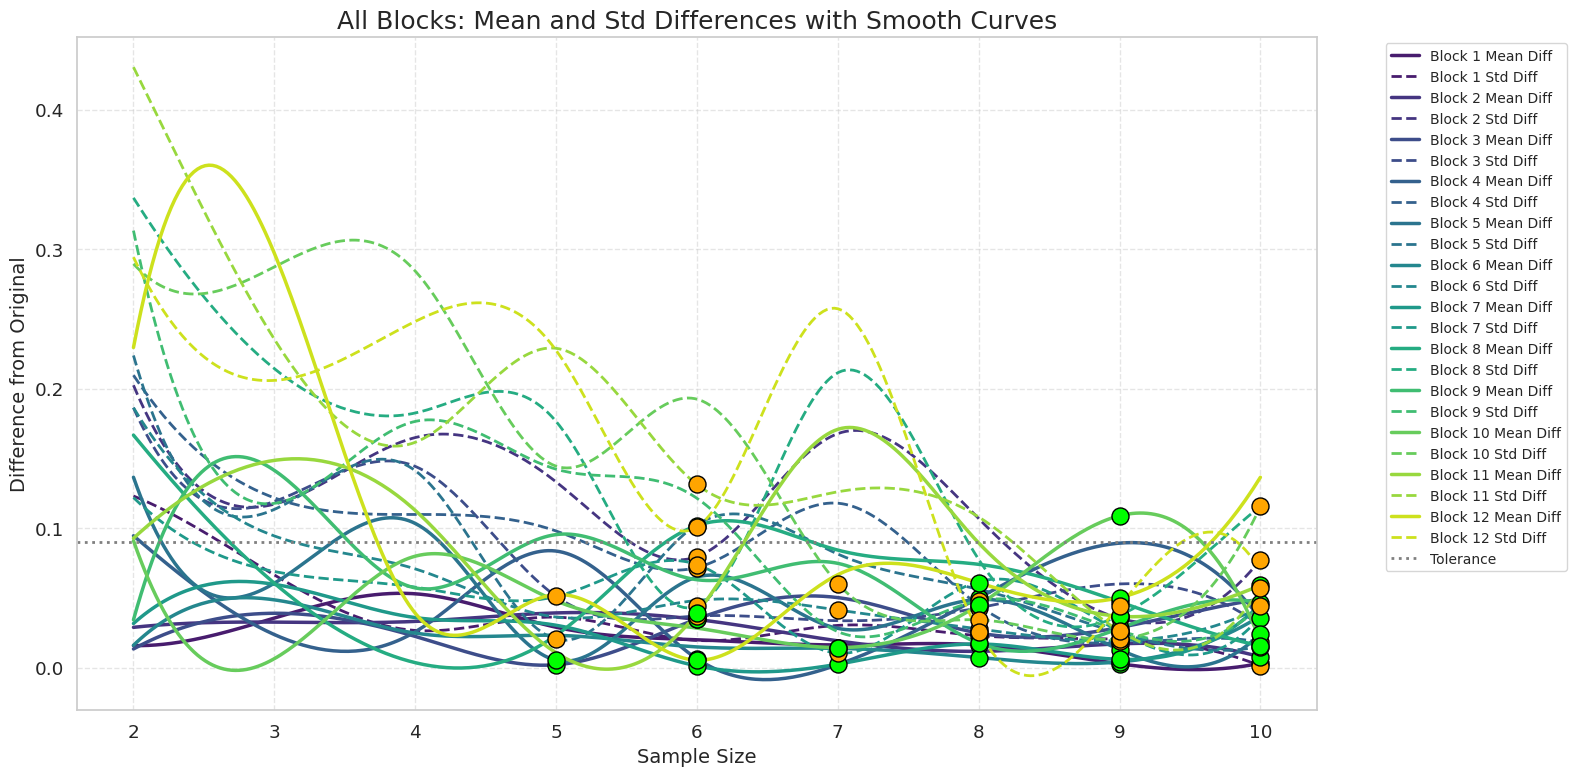

Block 1:
  Sample size 10: Mean Diff = 0.003, Std Diff = 0.001
  Sample size 9: Mean Diff = 0.003, Std Diff = 0.020
  Sample size 8: Mean Diff = 0.016, Std Diff = 0.023
Block 2:
  Sample size 9: Mean Diff = 0.017, Std Diff = 0.035
  Sample size 10: Mean Diff = 0.008, Std Diff = 0.077
  Sample size 6: Mean Diff = 0.035, Std Diff = 0.080
Block 3:
  Sample size 5: Mean Diff = 0.002, Std Diff = 0.051
  Sample size 8: Mean Diff = 0.025, Std Diff = 0.043
  Sample size 6: Mean Diff = 0.035, Std Diff = 0.037
Block 4:
  Sample size 10: Mean Diff = 0.035, Std Diff = 0.018
  Sample size 6: Mean Diff = 0.006, Std Diff = 0.072
  Sample size 8: Mean Diff = 0.050, Std Diff = 0.045
Block 5:
  Sample size 5: Mean Diff = 0.005, Std Diff = 0.020
  Sample size 9: Mean Diff = 0.013, Std Diff = 0.025
  Sample size 10: Mean Diff = 0.024, Std Diff = 0.015
Block 6:
  Sample size 9: Mean Diff = 0.004, Std Diff = 0.019
  Sample size 8: Mean Diff = 0.007, Std Diff = 0.028
  Sample size 7: Mean Diff = 0.014, Std D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

blocks = [
    [1.05, 1.43, 1.19, 1.03, 1.36, 1.41, 0.91, 0.41, 1.40, 1.48, 0.94, 0.76, 0.59, 1.25, 1.39, 1.44, 0.67, 0.90, 0.38, 1.33, 1.43, 0.91, 1.06, 1.35, 1.34, 1.10, 1.25, 0.64, 1.01, 1.21, 1.16, 1.19, 1.06, 1.22, 0.73, 1.08, 1.31, 1.49, 1.37, 1.36, 1.41, 1.38, 1.04, 1.24, 0.99, 0.88, 0.85, 0.87, 0.76, 1.34, 1.07, 1.47, 1.43, 1.40, 1.46, 0.96, 1.23, 1.48, 1.06, 1.15, 0.65, 1.11, 1.32, 1.45, 0.66, 1.11, 1.10, 1.29, 1.35, 1.48, 1.27, 1.18, 1.37, 0.74, 1.29, 0.91],

[1.28, 1.32, 1.15, 1.19, 1.06, 1.17, 1.39, 1.43, 1.39, 1.12, 1.15, 1.47, 0.90, 1.26, 1.30, 1.23, 1.47, 1.14, 1.29, 1.44, 1.16, 1.48, 1.25, 1.46, 1.36, 1.30, 1.33, 1.31, 1.42, 1.38, 1.01, 1.17, 1.44, 1.22, 1.46, 1.11, 1.23, 1.46, 2.05, 1.24, 1.33, 1.36, 0.79, 1.28, 0.57, 1.51, 1.14, 0.88, 2.24, 1.18, 1.33, 1.34, 0.74, 1.38, 1.37, 2.06, 0.66, 1.25, 2.71, 1.72, 1.44, 1.11, 1.12, 1.20, 1.10, 1.67, 1.6, 0.86, 1.51, 2.28, 1.48, 0.95, 2.84, 1.27, 1.11, 1.56,2.82, 1.52, 1.90, 1.68],

[0.97, 1.21, 1.57, 1.14, 2.39, 2.49, 1.84, 2.08, 2.86, 2.20, 1.38, 1.09, 2.28, 0.92, 1.91, 1.61, 1.95, 2.11, 2.11, 1.53, 2.65, 1.43, 2.94, 1.95, 2.08, 2.13, 1.93, 2.10, 1.67, 2.08, 2.85, 1.65, 2.68, 2.90, 2.34, 2.73, 2.47, 2.69, 2.18, 2.25, 1.70, 1.74, 2.97, 2.28, 1.91, 1.78, 2.51, 2.05, 2.34, 1.70, 2.58, 2.59, 2.26, 1.60, 1.52, 1.60, 1.74, 2.08, 2.21, 2.77, 1.55, 2.34, 1.52, 2.12, 2.49, 2.78, 1.91, 1.66, 1.75, 2.42, 2.71, 2.55, 2.80, 1.87, 2.30, 2.86, 2.74, 2.95, 2.13, 1.71],

[1.05, 1.23, 1.09, 0.99, 1.24, 1.15, 0.89, 2.00, 2.97, 2.00, 1.21, 1.18, 1.33, 1.36, 1.23, 1.18, 1.97, 2.48, 2.21, 2.47, 1.37, 1.29, 1.41, 1.09, 0.75, 0.55, 2.06, 1.76, 2.18, 2.60, 1.06, 1.17, 1.46, 1.14, 0.72, 2.93, 2.94, 2.97, 2.13, 1.67, 0.71, 1.28, 1.49, 1.14, 1.53, 1.76, 1.59, 1.72, 1.85, 1.85, 1.22, 1.37, 1.44, 1.40, 1.66, 2.18, 2.58, 2.03, 1.63, 2.73, 1.37, 0.58, 1.43, 1.78, 2.03, 1.99, 2.36, 1.85, 2.63, 2.39, 1.47, 2.12, 0.99, 2.63, 2.98, 1.88, 1.82, 1.97, 2.79, 2.79, 1.63],

[1.18, 2.82, 1.89, 1.77, 2.84, 1.62, 1.52, 1.58, 1.90, 2.86, 1.29, 1.56, 2.44, 2.21, 1.89, 2.89, 1.93, 1.75, 1.76, 2.09, 1.23, 2.91, 2.20, 1.64, 2.09, 1.80, 1.91, 1.61, 2.80, 2.67, 0.53, 1.85, 2.10, 1.77, 2.66, 1.60, 1.55, 1.62, 1.51, 2.86, 0.95, 2.75, 1.72, 1.79, 2.27, 2.81, 1.69, 1.78, 2.93, 2.19, 1.04, 1.64, 1.64, 1.70, 2.38, 2.87, 2.22, 2.41, 2.91, 1.81, 2.38,  2.88, 2.87, 1.69, 2.61, 2.31, 2.11, 2.79, 2.39, 1.36, 2.23, 2.02, 2.63, 2.18, 2.03, 1.56, 2.48, 1.67, 1.70,  1.87],

[2.55, 1.77, 1.91, 2.76, 2.85, 1.93, 1.90, 2.97, 2.44, 2.90, 2.79, 2.10, 1.70, 2.60, 2.86, 2.27, 2.03, 1.54, 2.44, 1.87, 2.92, 2.26, 2.21, 1.70, 2.64, 1.98, 2.38, 2.12, 2.10, 1.60, 2.53, 2.97, 2.11, 2.06, 2.03, 1.69, 2.62, 1.78, 1.73, 2.52, 1.80, 1.72, 1.82, 1.81, 1.91, 1.80, 2.12, 1.68, 1.70, 2.36, 2.49, 1.93, 1.91, 2.60, 2.15, 2.97, 2.20, 1.88, 1.86, 1.59, 2.09, 2.83, 2.00, 2.07, 1.67, 2.07, 1.69, 2.50, 1.54, 2.18, 1.65, 2.00, 2.71, 2.14, 2.17, 2.08, 2.03, 2.85, 1.62, 2.46],

[2.79, 2.67, 2.40, 1.86, 1.65, 1.80, 2.12, 2.87, 2.91, 2.50, 2.31, 2.65, 2.23, 2.15, 1.95, 2.01, 2.48, 1.62, 2.59, 2.67, 1.84, 2.17, 2.54, 2.51, 2.27, 1.51, 2.67, 2.48, 2.06, 2.66, 2.55, 2.88, 1.74, 2.67, 1.88, 1.97, 2.44, 2.39, 1.60, 2.67, 1.81, 1.67, 2.19, 2.31, 2.26, 2.26, 2.37, 2.18, 2.55, 1.91, 1.75, 2.44, 2.39, 1.56, 2.02, 2.93, 2.05, 2.19, 1.90, 1.88, 1.63, 2.08, 1.85, 1.67, 2.94, 2.81, 1.72, 1.74, 1.93, 1.91, 2.91, 1.93, 1.75, 1.87, 2.13, 2.18, 2.04, 1.77, 2.81, 2.35],

[2.28, 1.64, 1.82, 2.80, 1.60, 1.77, 2.42, 2.12, 2.23, 1.75, 1.56, 2.79, 1.91, 1.63, 2.19, 2.43, 2.01, 2.60, 2.44, 2.31, 1.69, 1.69, 2.12, 1.59, 2.14, 2.08, 1.62, 2.04, 1.58, 3.76, 1.88, 2.13, 1.93, 2.10, 2.44, 2.07, 2.17, 1.96, 2.20, 4.84, 2.39, 1.71, 2.66, 2.44, 2.79, 1.68, 1.75, 1.88, 1.64, 3.12, 2.02, 1.53, 2.44, 1.93, 1.91, 1.94, 2.04, 2.51, 2.22, 3.24, 2.26, 1.75, 2.11, 2.17, 2.13, 2.15, 3.63, 1.74, 4.81, 3.69, 2.25, 1.53, 1.98, 1.98, 2.61, 1.69, 3.93, 3.08, 2.51, 3.82, 3.04],

[2.22, 2.49, 2.16, 2.38, 2.38, 3.12, 3.27, 3.18, 3.20, 3.23, 2.22, 1.53, 2.83, 2.14, 3.37, 3.50, 3.85, 3.92, 3.75, 3.60, 1.77, 2.35, 1.53, 2.06, 3.14, 4.18, 3.72, 3.71, 3.74, 4.041, 2.95, 1.70, 1.74, 2.98,3.13, 3.82, 3.15, 3.18, 3.19, 3.13, 1.98, 2.62, 2.09, 2.30, 3.32, 3.48, 3.45, 3.06, 3.02, 3.80, 1.57, 2.04, 2.60, 2.59, 3.15, 3.30, 3.34, 4.74, 3.02, 3.50, 2.04, 2.08, 2.44, 1.73, 3.93, 3.27, 3.00, 3.44, 3.01, 3.43, 1.67, 1.79, 2.04, 1.65, 3.25, 3.03, 3.06, 4.24, 3.69, 3.35],

[2.29, 2.84, 2.42, 1.52, 2.93, 1.64, 1.68, 2.59, 2.83, 2.52, 2.00, 1.93, 1.54, 1.88, 2.84, 2.25, 2.40, 1.69, 2.31, 1.76, 2.37, 2.05, 2.59, 2.17, 2.45, 1.75, 1.87, 2.77, 2.54, 1.84, 2.38, 2.41, 1.56, 1.93, 2.46, 2.05, 2.49, 2.56, 2.57, 2.12, 2.26, 2.05, 1.75, 2.63, 1.73, 2.49, 2.32, 2.39, 1.77, 2.40, 2.86, 2.35, 2.59, 5.04, 2.24, 2.60, 2.14, 2.19, 2.32, 1.88, 2.19, 1.58, 1.59, 3.15, 3.73, 3.79, 1.88, 1.58, 2.14, 1.62, 1.75, 2.42, 2.22, 3.68, 4.09, 5.11, 2.50, 2.42, 2.73, 1.86],

[1.99, 1.59, 2.74, 5.01, 3.46, 3.43, 2.49, 2.06, 2.75, 2.02, 3.03, 2.72, 2.42, 3.47, 4.04, 3.10, 2.05, 2.18, 1.69, 2.36, 3.65, 2.26, 3.98, 3.16, 3.35, 3.73, 1.55, 1.78, 1.53, 1.72, 3.46, 1.92, 3.66, 3.06, 3.19, 3.91, 1.60, 2.91, 2.05, 1.54, 3.88, 3.74, 3.70, 3.50, 4.06, 3.01, 2.65, 1.97, 2.78, 2.86, 4.79, 3.16, 3.55, 4.10, 4.83, 3.01, 3.46, 2.54, 2.58, 2.35, 3.00, 3.00, 3.88, 6.17, 3.21, 4.05, 3.35, 1.52, 1.91, 2.43, 3.81, 5.35, 3.27, 3.02, 3.01, 3.94, 4.88, 1.97, 1.51, 2.77],

[3.41, 3.15, 3.28, 3.63, 3.71, 3.03, 3.00, 1.80, 2.29, 1.80, 3.05, 4.25, 6.66, 3.58, 3.02, 3.02, 3.26, 2.85, 2.48, 1.82, 3.27, 3.17, 4.59, 3.43, 3.44, 3.38, 3.45, 1.55, 2.31, 2.23, 3.06, 3.14, 3.59, 3.08, 3.02, 3.06, 3.56, 3.92, 2.27, 2.68, 5.45, 4.00, 3.44, 3.52, 3.39, 4.90, 3.11, 3.75, 2.37, 2.04, 3.73, 3.26, 3.07, 4.30, 3.05, 3.46, 3.96, 3.10, 2.32, 2.85, 3.10, 3.00, 4.04, 3.03, 3.36, 3.16, 3.82, 4.95, 1.69, 1.58, 4.44, 3.59, 3.34, 3.22, 3.16, 3.06, 3.49, 4.30, 2.87, 1.66]

]
num_repeats = 20
sample_sizes = np.array(range(2, 11))
tolerance = 0.09

results = []

for idx, block in enumerate(blocks):
    block = np.array(block)
    original_mean = np.mean(block)
    original_std = np.std(block)

    approx_results = {}
    diffs = {}

    for n in sample_sizes:
        means = []
        stds = []
        for _ in range(num_repeats):
            sample = np.random.choice(block, size=n, replace=False)
            means.append(np.mean(sample))
            stds.append(np.std(sample))
        approx_mean = np.mean(means)
        approx_std = np.mean(stds)
        approx_results[n] = (approx_mean, approx_std)
        diffs[n] = (abs(approx_mean - original_mean), abs(approx_std - original_std))

    sum_diffs = {n: diffs[n][0]+diffs[n][1] for n in sample_sizes}
    best_three = sorted(sum_diffs, key=sum_diffs.get)[:3]

    results.append({
        "block_index": idx+1,
        "original_mean": original_mean,
        "original_std": original_std,
        "approx_results": approx_results,
        "diffs": diffs,
        "best_three": best_three
    })

colors = sns.color_palette("viridis", len(blocks))

plt.figure(figsize=(16, 8))

for res, color in zip(results, colors):
    xs = sample_sizes
    mean_diffs = np.array([res['diffs'][n][0] for n in xs])
    std_diffs = np.array([res['diffs'][n][1] for n in xs])

    xs_smooth = np.linspace(xs.min(), xs.max(), 300)
    mean_spline = make_interp_spline(xs, mean_diffs)(xs_smooth)
    std_spline = make_interp_spline(xs, std_diffs)(xs_smooth)

    plt.plot(xs_smooth, mean_spline, color=color, linewidth=2.5, label=f'Block {res["block_index"]} Mean Diff')
    plt.plot(xs_smooth, std_spline, color=color, linestyle='--', linewidth=2, label=f'Block {res["block_index"]} Std Diff')

    for i, n in enumerate(res['best_three']):
        plt.scatter(n, mean_diffs[n-2], color='lime', edgecolors='black', s=150, zorder=5)
        plt.scatter(n, std_diffs[n-2], color='orange', edgecolors='black', s=150, zorder=5)

plt.axhline(tolerance, color='gray', linestyle=':', linewidth=2, label='Tolerance')
plt.xlabel("Sample Size", fontsize=14)
plt.ylabel("Difference from Original", fontsize=14)
plt.title("All Blocks: Mean and Std Differences with Smooth Curves", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

for res in results:
    print(f"Block {res['block_index']}:")
    for n in res['best_three']:
        mean_diff = res['diffs'][n][0]
        std_diff = res['diffs'][n][1]
        print(f"  Sample size {n}: Mean Diff = {mean_diff:.3f}, Std Diff = {std_diff:.3f}")



Block  Manual n   Algorithm n  Match 
1      3          3            Yes   
2      2          2            Yes   
3      2          3            No    
4      4          5            No    
5      3          3            Yes   
6      2          2            Yes   
7      5          5            Yes   
8      2          2            Yes   
9      2          2            Yes   
10     2          2            Yes   
11     4          4            Yes   
12     3          3            Yes   


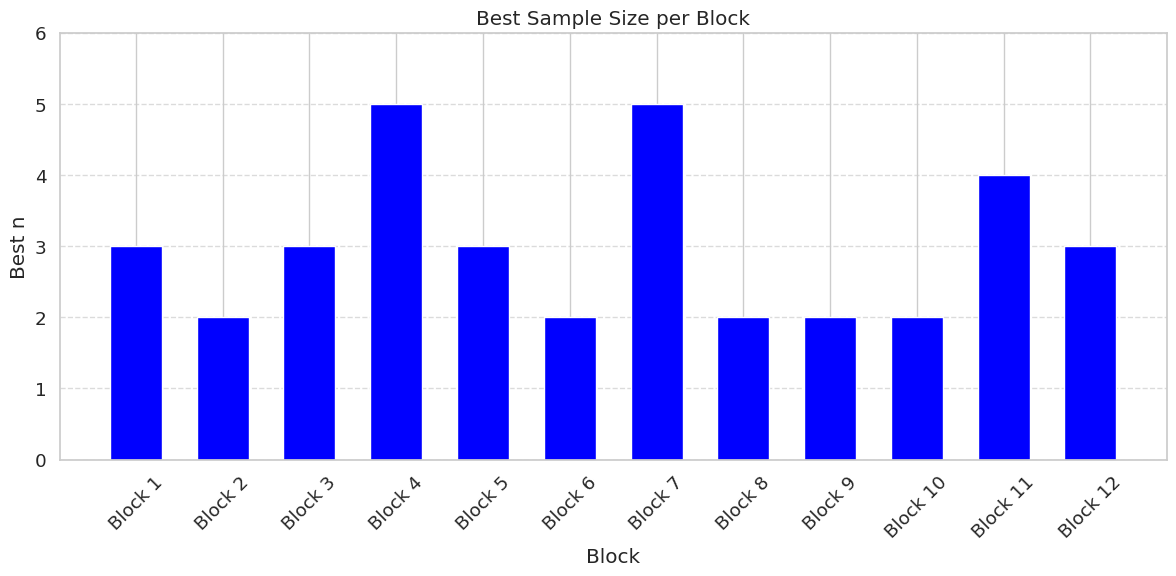

In [2]:


import numpy as np
import matplotlib.pyplot as plt

blocks = [
    [1.05, 1.43, 1.19, 1.03, 1.36, 1.41, 0.91, 0.41, 1.40, 1.48, 0.94, 0.76, 0.59, 1.25, 1.39, 1.44, 0.67, 0.90, 0.38, 1.33, 1.43, 0.91, 1.06, 1.35, 1.34, 1.10, 1.25, 0.64, 1.01, 1.21, 1.16, 1.19, 1.06, 1.22, 0.73, 1.08, 1.31, 1.49, 1.37, 1.36, 1.41, 1.38, 1.04, 1.24, 0.99, 0.88, 0.85, 0.87, 0.76, 1.34, 1.07, 1.47, 1.43, 1.40, 1.46, 0.96, 1.23, 1.48, 1.06, 1.15, 0.65, 1.11, 1.32, 1.45, 0.66, 1.11, 1.10, 1.29, 1.35, 1.48, 1.27, 1.18, 1.37, 0.74, 1.29, 0.91],

    [1.28, 1.32, 1.15, 1.19, 1.06, 1.17, 1.39, 1.43, 1.39, 1.12, 1.15, 1.47, 0.90, 1.26, 1.30, 1.23, 1.47, 1.14, 1.29, 1.44, 1.16, 1.48, 1.25, 1.46, 1.36, 1.30, 1.33, 1.31, 1.42, 1.38, 1.01, 1.17, 1.44, 1.22, 1.46, 1.11, 1.23, 1.46, 2.05, 1.24, 1.33, 1.36, 0.79, 1.28, 0.57, 1.51, 1.14, 0.88, 2.24, 1.18, 1.33, 1.34, 0.74, 1.38, 1.37, 2.06, 0.66, 1.25, 2.71, 1.72, 1.44, 1.11, 1.12, 1.20, 1.10, 1.67, 1.6, 0.86, 1.51, 2.28, 1.48, 0.95, 2.84, 1.27, 1.11, 1.56,2.82, 1.52, 1.90, 1.68],

    [0.97, 1.21, 1.57, 1.14, 2.39, 2.49, 1.84, 2.08, 2.86, 2.20, 1.38, 1.09, 2.28, 0.92, 1.91, 1.61, 1.95, 2.11, 2.11, 1.53, 2.65, 1.43, 2.94, 1.95, 2.08, 2.13, 1.93, 2.10, 1.67, 2.08, 2.85, 1.65, 2.68, 2.90, 2.34, 2.73, 2.47, 2.69, 2.18, 2.25, 1.70, 1.74, 2.97, 2.28, 1.91, 1.78, 2.51, 2.05, 2.34, 1.70, 2.58, 2.59, 2.26, 1.60, 1.52, 1.60, 1.74, 2.08, 2.21, 2.77, 1.55, 2.34, 1.52, 2.12, 2.49, 2.78, 1.91, 1.66, 1.75, 2.42, 2.71, 2.55, 2.80, 1.87, 2.30, 2.86, 2.74, 2.95, 2.13, 1.71],

    [1.05, 1.23, 1.09, 0.99, 1.24, 1.15, 0.89, 2.00, 2.97, 2.00, 1.21, 1.18, 1.33, 1.36, 1.23, 1.18, 1.97, 2.48, 2.21, 2.47, 1.37, 1.29, 1.41, 1.09, 0.75, 0.55, 2.06, 1.76, 2.18, 2.60, 1.06, 1.17, 1.46, 1.14, 0.72, 2.93, 2.94, 2.97, 2.13, 1.67, 0.71, 1.28, 1.49, 1.14, 1.53, 1.76, 1.59, 1.72, 1.85, 1.85, 1.22, 1.37, 1.44, 1.40, 1.66, 2.18, 2.58, 2.03, 1.63, 2.73, 1.37, 0.58, 1.43, 1.78, 2.03, 1.99, 2.36, 1.85, 2.63, 2.39, 1.47, 2.12, 0.99, 2.63, 2.98, 1.88, 1.82, 1.97, 2.79, 2.79, 1.63],

    [1.18, 2.82, 1.89, 1.77, 2.84, 1.62, 1.52, 1.58, 1.90, 2.86, 1.29, 1.56, 2.44, 2.21, 1.89, 2.89, 1.93, 1.75, 1.76, 2.09, 1.23, 2.91, 2.20, 1.64, 2.09, 1.80, 1.91, 1.61, 2.80, 2.67, 0.53, 1.85, 2.10, 1.77, 2.66, 1.60, 1.55, 1.62, 1.51, 2.86, 0.95, 2.75, 1.72, 1.79, 2.27, 2.81, 1.69, 1.78, 2.93, 2.19, 1.04, 1.64, 1.64, 1.70, 2.38, 2.87, 2.22, 2.41, 2.91, 1.81, 2.38,  2.88, 2.87, 1.69, 2.61, 2.31, 2.11, 2.79, 2.39, 1.36, 2.23, 2.02, 2.63, 2.18, 2.03, 1.56, 2.48, 1.67, 1.70,  1.87],

    [2.55, 1.77, 1.91, 2.76, 2.85, 1.93, 1.90, 2.97, 2.44, 2.90, 2.79, 2.10, 1.70, 2.60, 2.86, 2.27, 2.03, 1.54, 2.44, 1.87, 2.92, 2.26, 2.21, 1.70, 2.64, 1.98, 2.38, 2.12, 2.10, 1.60, 2.53, 2.97, 2.11, 2.06, 2.03, 1.69, 2.62, 1.78, 1.73, 2.52, 1.80, 1.72, 1.82, 1.81, 1.91, 1.80, 2.12, 1.68, 1.70, 2.36, 2.49, 1.93, 1.91, 2.60, 2.15, 2.97, 2.20, 1.88, 1.86, 1.59, 2.09, 2.83, 2.00, 2.07, 1.67, 2.07, 1.69, 2.50, 1.54, 2.18, 1.65, 2.00, 2.71, 2.14, 2.17, 2.08, 2.03, 2.85, 1.62, 2.46],

    [2.79, 2.67, 2.40, 1.86, 1.65, 1.80, 2.12, 2.87, 2.91, 2.50, 2.31, 2.65, 2.23, 2.15, 1.95, 2.01, 2.48, 1.62, 2.59, 2.67, 1.84, 2.17, 2.54, 2.51, 2.27, 1.51, 2.67, 2.48, 2.06, 2.66, 2.55, 2.88, 1.74, 2.67, 1.88, 1.97, 2.44, 2.39, 1.60, 2.67, 1.81, 1.67, 2.19, 2.31, 2.26, 2.26, 2.37, 2.18, 2.55, 1.91, 1.75, 2.44, 2.39, 1.56, 2.02, 2.93, 2.05, 2.19, 1.90, 1.88, 1.63, 2.08, 1.85, 1.67, 2.94, 2.81, 1.72, 1.74, 1.93, 1.91, 2.91, 1.93, 1.75, 1.87, 2.13, 2.18, 2.04, 1.77, 2.81, 2.35],

    [2.28, 1.64, 1.82, 2.80, 1.60, 1.77, 2.42, 2.12, 2.23, 1.75, 1.56, 2.79, 1.91, 1.63, 2.19, 2.43, 2.01, 2.60, 2.44, 2.31, 1.69, 1.69, 2.12, 1.59, 2.14, 2.08, 1.62, 2.04, 1.58, 3.76, 1.88, 2.13, 1.93, 2.10, 2.44, 2.07, 2.17, 1.96, 2.20, 4.84, 2.39, 1.71, 2.66, 2.44, 2.79, 1.68, 1.75, 1.88, 1.64, 3.12, 2.02, 1.53, 2.44, 1.93, 1.91, 1.94, 2.04, 2.51, 2.22, 3.24, 2.26, 1.75, 2.11, 2.17, 2.13, 2.15, 3.63, 1.74, 4.81, 3.69, 2.25, 1.53, 1.98, 1.98, 2.61, 1.69, 3.93, 3.08, 2.51, 3.82, 3.04],

    [2.22, 2.49, 2.16, 2.38, 2.38, 3.12, 3.27, 3.18, 3.20, 3.23, 2.22, 1.53, 2.83, 2.14, 3.37, 3.50, 3.85, 3.92, 3.75, 3.60, 1.77, 2.35, 1.53, 2.06, 3.14, 4.18, 3.72, 3.71, 3.74, 4.041, 2.95, 1.70, 1.74, 2.98,3.13, 3.82, 3.15, 3.18, 3.19, 3.13, 1.98, 2.62, 2.09, 2.30, 3.32, 3.48, 3.45, 3.06, 3.02, 3.80, 1.57, 2.04, 2.60, 2.59, 3.15, 3.30, 3.34, 4.74, 3.02, 3.50, 2.04, 2.08, 2.44, 1.73, 3.93, 3.27, 3.00, 3.44, 3.01, 3.43, 1.67, 1.79, 2.04, 1.65, 3.25, 3.03, 3.06, 4.24, 3.69, 3.35],

    [2.29, 2.84, 2.42, 1.52, 2.93, 1.64, 1.68, 2.59, 2.83, 2.52, 2.00, 1.93, 1.54, 1.88, 2.84, 2.25, 2.40, 1.69, 2.31, 1.76, 2.37, 2.05, 2.59, 2.17, 2.45, 1.75, 1.87, 2.77, 2.54, 1.84, 2.38, 2.41, 1.56, 1.93, 2.46, 2.05, 2.49, 2.56, 2.57, 2.12, 2.26, 2.05, 1.75, 2.63, 1.73, 2.49, 2.32, 2.39, 1.77, 2.40, 2.86, 2.35, 2.59, 5.04, 2.24, 2.60, 2.14, 2.19, 2.32, 1.88, 2.19, 1.58, 1.59, 3.15, 3.73, 3.79, 1.88, 1.58, 2.14, 1.62, 1.75, 2.42, 2.22, 3.68, 4.09, 5.11, 2.50, 2.42, 2.73, 1.86],

    [1.99, 1.59, 2.74, 5.01, 3.46, 3.43, 2.49, 2.06, 2.75, 2.02, 3.03, 2.72, 2.42, 3.47, 4.04, 3.10, 2.05, 2.18, 1.69, 2.36, 3.65, 2.26, 3.98, 3.16, 3.35, 3.73, 1.55, 1.78, 1.53, 1.72, 3.46, 1.92, 3.66, 3.06, 3.19, 3.91, 1.60, 2.91, 2.05, 1.54, 3.88, 3.74, 3.70, 3.50, 4.06, 3.01, 2.65, 1.97, 2.78, 2.86, 4.79, 3.16, 3.55, 4.10, 4.83, 3.01, 3.46, 2.54, 2.58, 2.35, 3.00, 3.00, 3.88, 6.17, 3.21, 4.05, 3.35, 1.52, 1.91, 2.43, 3.81, 5.35, 3.27, 3.02, 3.01, 3.94, 4.88, 1.97, 1.51, 2.77],

    [3.41, 3.15, 3.28, 3.63, 3.71, 3.03, 3.00, 1.80, 2.29, 1.80, 3.05, 4.25, 6.66, 3.58, 3.02, 3.02, 3.26, 2.85, 2.48, 1.82, 3.27, 3.17, 4.59, 3.43, 3.44, 3.38, 3.45, 1.55, 2.31, 2.23, 3.06, 3.14, 3.59, 3.08, 3.02, 3.06, 3.56, 3.92, 2.27, 2.68, 5.45, 4.00, 3.44, 3.52, 3.39, 4.90, 3.11, 3.75, 2.37, 2.04, 3.73, 3.26, 3.07, 4.30, 3.05, 3.46, 3.96, 3.10, 2.32, 2.85, 3.10, 3.00, 4.04, 3.03, 3.36, 3.16, 3.82, 4.95, 1.69, 1.58, 4.44, 3.59, 3.34, 3.22, 3.16, 3.06, 3.49, 4.30, 2.87, 1.66]

]

manual_ns = [3,2,2,4,3,2,5,2,2,2,4,3]

def gaussian_weights(arr, sigma_scale=1.0, eps=1e-9):
    arr = np.array(arr)
    mu = np.mean(arr)
    sigma = np.std(arr, ddof=0)
    sigma = max(sigma, eps)
    z = (arr - mu) / (sigma * sigma_scale)
    weights = np.exp(-0.5 * z**2)
    return weights

def top_n_by_weight(arr, n, sigma_scale=1.0):
    arr = np.array(arr)
    weights = gaussian_weights(arr, sigma_scale)
    idx_sorted = np.argsort(-weights)
    chosen = arr[idx_sorted[:n]]
    return chosen

sample_sizes = range(2, 11)
best_ns = []

for block in blocks:
    arr = np.array(block)
    mu_all = np.mean(arr)

    n_results = []
    for n in sample_sizes:
        chosen = top_n_by_weight(arr, n)
        mu_n = np.mean(chosen)
        sigma_n = np.std(chosen, ddof=0)
        error = abs(mu_n - mu_all)
        n_results.append((n, error, sigma_n))

    n_results_sorted = sorted(n_results, key=lambda x: x[1])
    top4 = n_results_sorted[:4]

    best_n = min(top4, key=lambda x: x[2])[0]
    best_ns.append(best_n)

print(f"{'Block':<6} {'Manual n':<10} {'Algorithm n':<12} {'Match':<6}")
for i, (m, a) in enumerate(zip(manual_ns, best_ns), 1):
    match = "Yes" if m == a else "No"
    print(f"{i:<6} {m:<10} {a:<12} {match:<6}")

plt.figure(figsize=(12,6))
x = np.arange(len(best_ns))
plt.bar(x, best_ns, width=0.6, color='blue', label='Algorithm n')
plt.xticks(x, [f'Block {i}' for i in range(1,len(best_ns)+1)], rotation=45)
plt.ylim(0, 6)
plt.ylabel("Best n")
plt.xlabel("Block")
plt.title("Best Sample Size per Block")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
